## preparing the tools

In [1]:
#import all the tools

#regular data nalysis tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#to have plots inside the notebook
%matplotlib inline

#models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model eval
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\SHREYANIL BHUYAN\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

## Load data

In [8]:
df=pd.read_csv("heart-disease.csv")
df.shape #(rows,coloumns)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data exploration(Exploratory data analysis or EDA)

In [3]:
# Let's see the classification of target
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

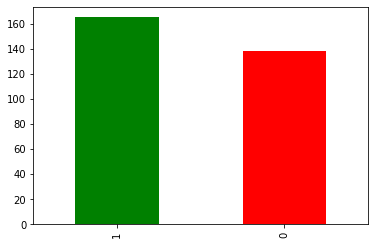

In [4]:
df["target"].value_counts().plot(kind="bar", color=["green","red"]);

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().sum()#returns the no. of NaN if 0 is returned then none of the data is missing


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart disese feq acc to sex

In [9]:
df.sex.value_counts()


1    207
0     96
Name: sex, dtype: int64

In [10]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


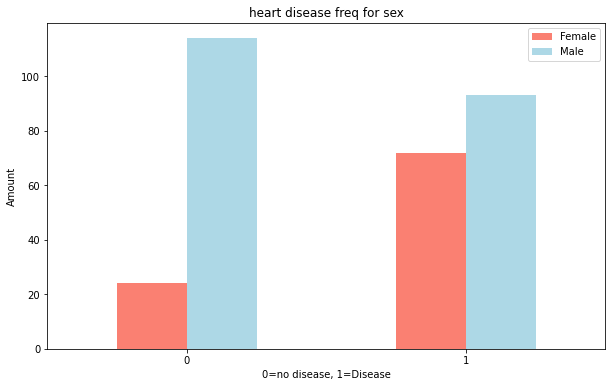

In [17]:
#create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"]);
plt.title("heart disease freq for sex");
plt.xlabel("0=no disease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

## Age vs. max. heart rate for heart disease

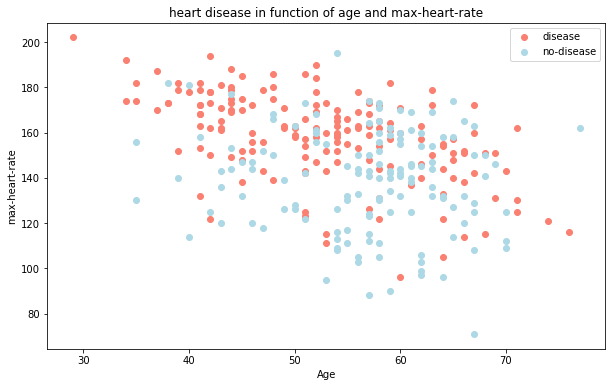

In [22]:
#create another fig
plt.figure(figsize=(10,6))

#scatter with pos exapmples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon");
#scatter with neg example
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");
#add some helpful info
plt.title("heart disease in function of age and max-heart-rate");
plt.xlabel("Age")
plt.ylabel("max-heart-rate")
plt.legend(["disease","no-disease"])
plt.xticks(rotation=0);

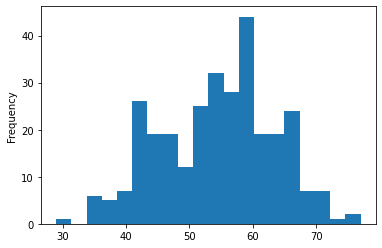

In [25]:
#check the distribution of the age column with a histogram
df.age.plot.hist(bins=20);

## heart disese freq per chest pain type

In [27]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


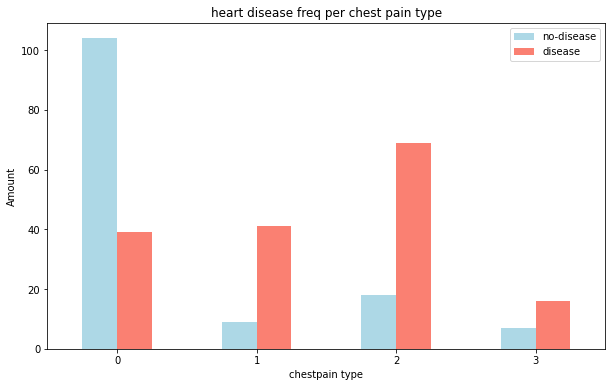

In [28]:
#make the cross tab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["lightblue","salmon"]);
#add communication
plt.title("heart disease freq per chest pain type");
plt.xlabel("chestpain type")
plt.ylabel("Amount")
plt.legend(["no-disease","disease"])
plt.xticks(rotation=0);

In [29]:
#make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

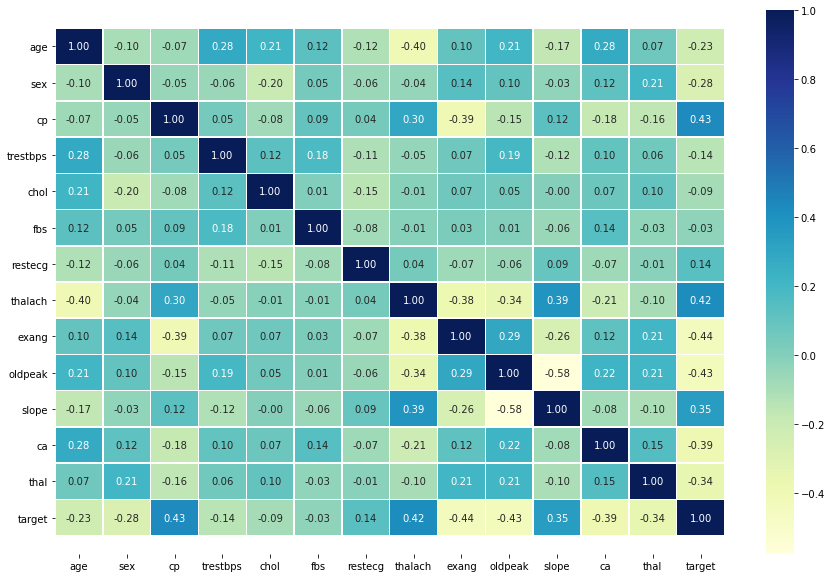

In [33]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");
bottom,top=ax.get_ylim()
ax.set_ylim(bottom +0.5, top-0.5)
#higher positive val more corelation

## Modelling

In [52]:
x=df.drop("target",axis=1)
y=df["target"]

In [53]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [54]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [55]:
#split data into train and test ser
np.random.seed(0)

#split into test and train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [56]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [57]:
y_train

74     1
153    1
64     1
296    0
287    0
      ..
251    0
192    0
117    1
47     1
172    0
Name: target, Length: 242, dtype: int64

We are going to try 3 models:
1.logistic regression
2.k-nearest neighbours classifier
3.random forestclassifier

In [61]:
#putting models in a dictionary
models = {"Logistic Regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier()}
#creating a model to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and evaluate given model
    models:dictionary for storing models
    """
    #set random seed
    np.random.seed(42)
    
    #make dictionary to keep model score
    model_scores={}
    
    #Loop through models
    for name,model in models.items():
        #fit the model to the data
        model.fit(x_train,y_train)
        #evaluate and append in model_scores
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [62]:
model_scores = fit_and_score(models,x_train,x_test,y_train,y_test)
model_scores

C:\Users\SHREYANIL BHUYAN\Desktop\heart-disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8524590163934426}

## model comparision

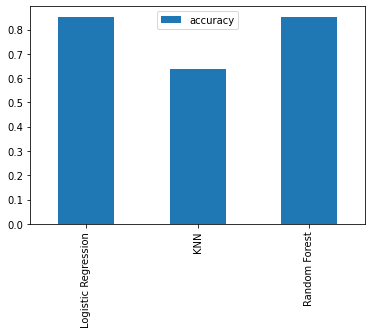

In [66]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

## Hyper parameter tuning

In [75]:
#tuning knn

train_scores = []
test_scores = []

#create a list for different values of n_neighbour(one of the hyper parameter)
neighbors=range(1,21)

#set up knn
knn=KNeighborsClassifier()

#lopp through n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the algorithm
    knn.fit(x_train,y_train)
    
    #update the training score list
    train_scores.append(knn.score(x_train,y_train))
    
    #test score
    test_scores.append(knn.score(x_test,y_test))    
    

In [76]:
train_scores
test_scores

[0.5245901639344263,
 0.5901639344262295,
 0.639344262295082,
 0.639344262295082,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836,
 0.6557377049180327,
 0.7049180327868853,
 0.6721311475409836,
 0.7213114754098361,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.7213114754098361,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344]

Maximum KNN score on the test data: 72.13%


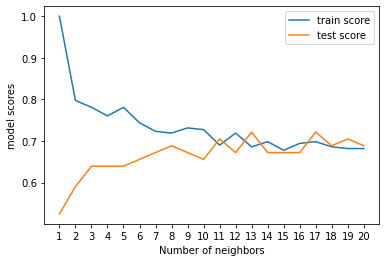

In [81]:
plt.plot(neighbors,train_scores,label="train score")
plt.plot(neighbors,test_scores,label="test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("model scores")
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_scores)*100:0.2f}%")

## Hyperparameter tuning with randomized CV
logistic regression and forest classifier using randomizedcv

In [118]:
#create a hyper parameter grid for logisric regression
log_reg_grid={"C": np.logspace(-4,4,20),
              "solver":["liblinear"]}
#create a hyper parameter grid for RandomForest Clasiifier
rf_grid ={"n_estimators" : np.arange(10,1000,50),
          "max_depth" : [None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf" : np.arange (1,20,2)}


In [119]:
#tune logistic egression
np.random.seed(42)

#setup random hyperparameters search formlogistic regression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True
                               )
#Fir random hyperparameter model for logisticregression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [120]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [121]:
rs_log_reg.score(x_test,y_test)

0.8524590163934426

In [122]:
#tune random forest
np.random.seed(42)

#setup random hyperparameters search for random forest

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True
                               )
#Fir random hyperparameter model for logisticregression
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [123]:
#find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 8,
 'min_samples_leaf': 19,
 'max_depth': None}

In [124]:
#evaluation
rs_rf.score(x_test,y_test)

0.8524590163934426

## Hyperparameter tuning using gridsearch cv

In [155]:
#logistic regression
log_reg_grid={"C": np.logspace(-4,4,100),
              "solver":["liblinear"]}

#setting usp grid search hyperparameter
gs_log_reg = GridSearchCV(LogisticRegression(),
                               param_grid=log_reg_grid,
                               cv=5,
                               verbose=True
                               )
#Fir random hyperparameter model for logisticregression
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.848035...
       1.38488637e+02, 1.66810054e+02, 2.00923300e+02, 2.42012826e+02,
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [156]:
#find the best hyperparameters
gs_log_reg.best_params_

{'C': 0.9111627561154896, 'solver': 'liblinear'}

In [157]:
gs_log_reg.score(x_test,y_test)

0.8524590163934426

## Evaluating our tuned machine learning classifier,beyond accuracy

In [158]:
#make prediction with tuned model
y_pred = gs_log_reg.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [159]:
y_test


225    0
152    1
228    0
201    0
52     1
      ..
146    1
302    0
26     1
108    1
89     1
Name: target, Length: 61, dtype: int64

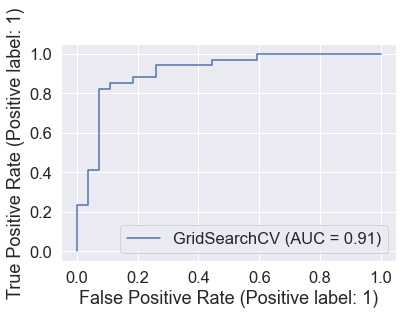

In [160]:
#plot roc curve and calc auc metric
plot_roc_curve(gs_log_reg,x_test,y_test)


In [161]:
#confusion matrix
print(confusion_matrix(y_test,y_preds))

[[22  5]
 [ 4 30]]


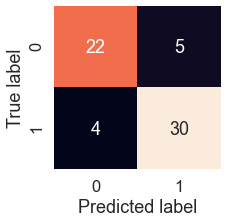

In [162]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

In [163]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## calculate eval matrix using cross validation

In [164]:
#check best hyperparameters
gs_log_reg.best_params_

{'C': 0.9111627561154896, 'solver': 'liblinear'}

In [166]:
#create a new classifier with best parameters
clf=LogisticRegression(C=0.9111627561154896,solver="liblinear")

In [167]:
#cross-validation accuracy
cv_acc=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="accuracy")
cv_acc

array([0.81967213, 0.86885246, 0.85245902, 0.85      , 0.71666667])

In [168]:
cv_acc =np.mean(cv_acc)
cv_acc

0.8215300546448088

In [173]:
#cross-validation precision
cv_precision=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.817900063251107

In [174]:
cv_recall=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.8727272727272727

In [175]:
cv_f1=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8431741323998502

<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

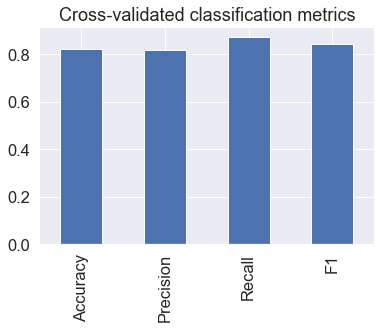

In [176]:
#visualising cross-validated matrics
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_precision,
                         "Recall" :cv_recall,
                         "F1":cv_f1},
                         index=[0]   
)
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend=False)

## Feature Importance

In [177]:
#fit an instance of logistic regression
clf=LogisticRegression(C=0.9111627561154896,solver="liblinear")
clf.fit(x_train,y_train);

In [178]:
clf.coef_

array([[ 0.00684132, -1.48153524,  0.73778755, -0.00843411, -0.00372545,
        -0.31230495,  0.22226438,  0.02914696, -0.81781306, -0.53342538,
         0.20329587, -0.8486695 , -0.67161435]])

In [181]:
feature_dict= dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.006841319358757042,
 'sex': -1.4815352401965136,
 'cp': 0.7377875544991528,
 'trestbps': -0.008434110227278083,
 'chol': -0.0037254521977860703,
 'fbs': -0.31230495379348017,
 'restecg': 0.2222643764491405,
 'thalach': 0.029146956078417784,
 'exang': -0.8178130648976057,
 'oldpeak': -0.5334253813406645,
 'slope': 0.20329586805517935,
 'ca': -0.8486695022927707,
 'thal': -0.6716143477440047}

<AxesSubplot:title={'center':'Feature Importance'}>

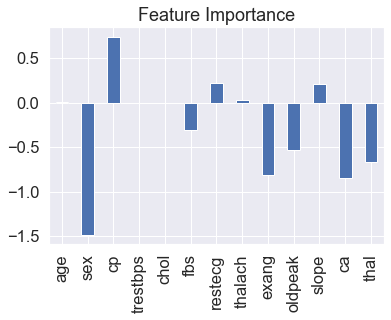

In [182]:
cv_metrics=pd.DataFrame(feature_dict,index=[0])
cv_metrics.T.plot.bar(title="Feature Importance",legend=False)

In [183]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93
